In [95]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [149]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2017,1,1)

#### Panel-Object

In [122]:
df = data.DataReader(['BAC','C','GS','JPM','MS','WFC'], 'stooq', start, end)

#### Create a Ticker for the stocks

In [123]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

#### Combine bank data into one DataFrame

In [124]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers)

In [125]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [126]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.981  41.205  40.308  41.120  18658143.0  431.01  434.32   
2006-01-04   41.051  41.263  40.570  40.684  20331205.0  429.79  431.88   
2006-01-05   40.684  40.903  40.458  40.737  16971119.0  426.06  429.05   
2006-01-06   40.875  40.971  40.485  40.675  14419805.0  429.95  430.10   
2006-01-09   40.806  41.025  40.492  40.702  17882700.0  427.47  428.70   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   423.15  433.55  1748134.0  ...  39.536  40.445  39.233  40.320   
2006-01-04   425.26  425.53  2127119.0  ...  40.595  40.994  40.352  40.352   
2006-01-05   425.71  427.62  1290703.0  ...  40.352  40.518  40.117  40.462   
2006-01-06   423.96  427.62  1557821.0  ...  40.642  40.693  40.144  40.502   
2006-01-09   424.82  425.62  1910873.0  ...  40.541  41.002  40.533  40.926   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6454836.0  23.520  23.801  23.223  23.743  14801667.0  
2006-01-04   9576975.0  23.665  23.680  23.339  23.467  14604966.0  
2006-01-05   6936221.0  23.444  23.482  23.301  23.444  13612309.0  
2006-01-06   8270878.0  23.507  23.645  23.363  23.576  11291370.0  
2006-01-09   4975275.0  23.576  23.680  23.482  23.576   7550515.0  

[5 rows x 30 columns]

#### Check highest Stock from the banks

In [127]:
for tick in tickers:
    print(bank_stocks[tick]['Close'].max())

47.949
496.17
211.9
60.015
61.751999999999995
48.701


In [128]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     47.949
C      496.170
GS     211.900
JPM     60.015
MS      61.752
WFC     48.701
dtype: float64

In [129]:
returns = pd.DataFrame()

In [130]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010603,-0.018498,-0.013618,-0.014233,0.000794,-0.011624
2006-01-05,0.001303,0.004912,-0.000368,0.003034,0.002726,-0.000980
2006-01-06,-0.001522,0.000000,0.013903,0.007081,0.000989,0.005630
2006-01-09,0.000664,-0.004677,0.012078,0.016208,0.010469,0.000000


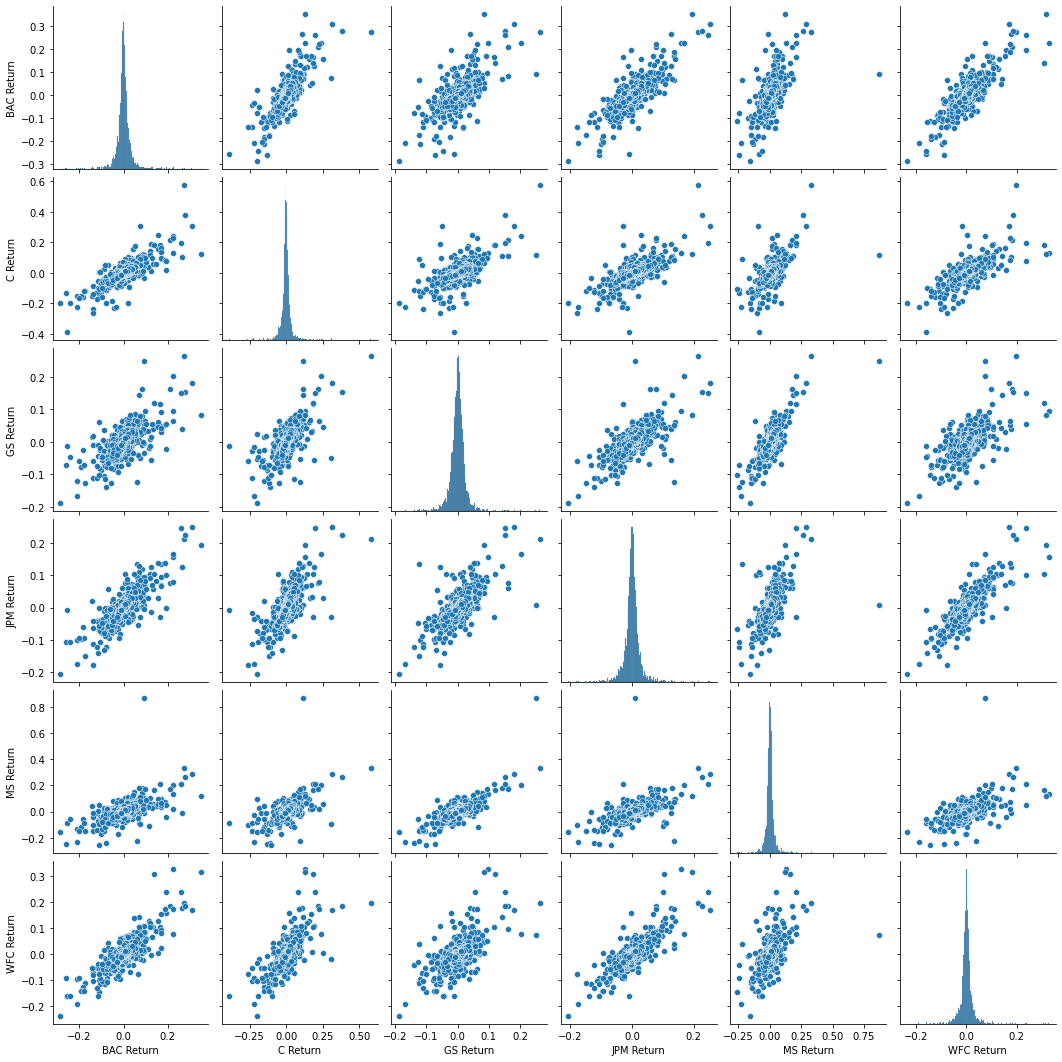

In [131]:
import seaborn as sns
sns.pairplot(returns[1:])

In [132]:
returns.loc['2016-01-01':'2016-12-31'].head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,


#### When do have the companies the best and worst days 

In [133]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [134]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [135]:
returns.std() # Standard deviation

BAC Return    0.036604
C Return      0.038615
GS Return     0.025370
JPM Return    0.027668
MS Return     0.037705
WFC Return    0.030221
dtype: float64

In [140]:
returns.loc['2009-01-01':'2009-12-31'].std()

BAC Return    0.077648
C Return      0.079121
GS Return     0.038100
JPM Return    0.051167
MS Return     0.051132
WFC Return    0.066814
dtype: float64

#### Create distplot

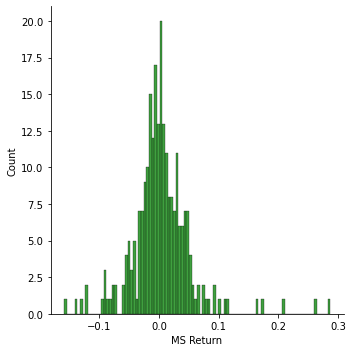

In [141]:
sns.displot(returns.loc['2009-01-01':'2009-12-31']['MS Return'],color='green',bins=100)

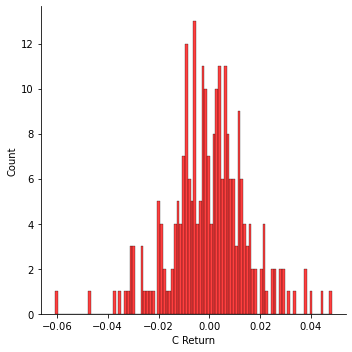

In [142]:
sns.displot(returns.loc['2015']['C Return'],color='red',bins=100)

### Better visualisation

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import chart_studio.plotly as py
from chart_studio.plotly import plot
import cufflinks as cf
cf.go_offline()

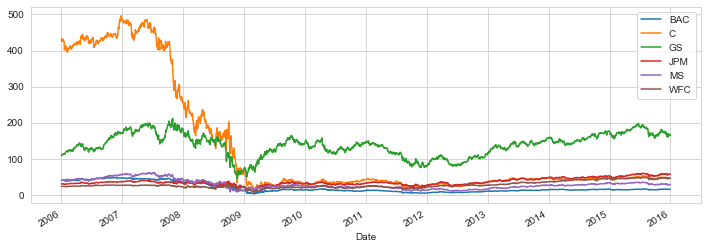

In [154]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend()

In [157]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

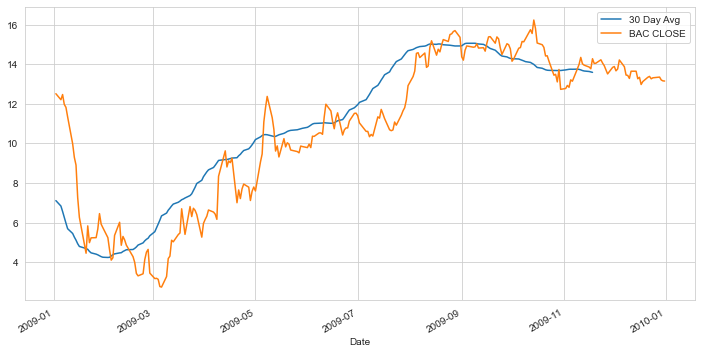

In [168]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2009'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2009'].plot(label='BAC CLOSE')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

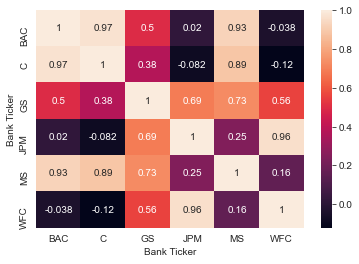

In [169]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [170]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')